# AIN311 COURSE PROJECT


## Feature  Desription :
url :https://data.scorenetwork.org/hockey/nhl-shots.html

| Variable                | Description                                                                                                     |
|-------------------------|-----------------------------------------------------------------------------------------------------------------|
| `game_id`               | Unique integer identifier for game shot took place in                                                          |
| `description`           | String detailed description of shot event                                                                      |
| `shot_outcome`          | String denoting the outcome of the shot, either BLOCKED_SHOT (meaning blocked by a non-goalie), GOAL, MISSED_SHOT (shot that missed the net), or SHOT (shot on net that was saved by a goalie) |
| `period`                | Integer value of the game period                                                                               |
| `period_seconds_remaining` | Numeric value of the seconds remaining in the period                                                       |
| `game_seconds_remaining`   | Numeric value of the seconds remaining in the game; negative for overtime periods                         |
| `home_score`            | Integer value of the home team score after the event                                                           |
| `away_score`            | Integer value of the away team score after the event                                                           |
| `home_name`             | String name of the home team                                                                                   |
| `away_name`             | String name of the away team                                                                                   |
| `event_team`            | String defining the team taking the shot                                                                      |
| `event_goalie_name`     | String name of goalie (if in net)                                                                             |
| `empty_net`             | Boolean indicating if the shot was during an empty net situation, TRUE if so but FALSE or NA if not           |
| `event_player_1_name`   | String name of the primary event player                                                                       |
| `event_player_1_type`   | String indicator for the role of event_player_1 (typically the shooter)                                       |
| `event_player_2_name`   | String name of the secondary event player                                                                     |
| `event_player_2_type`   | String indicator for the role of event_player_2 (blocker, assist, or goalie)                                  |
| `strength_code`         | String indicator for game strength: EV (Even), SH (Shorthanded), or PP (Power Play)                           |
| `x_fixed`               | Numeric transformed x-coordinate of event in feet, where the home team always shoots to the right, away team to the left |
| `y_fixed`               | Numeric transformed y-coordinate of event in feet, where the home team always shoots to the right, away team to the left |
| `shot_distance`         | Numeric distance (in feet) to center of net for unblocked shot events                                         |
| `shot_angle`            | Numeric angle (in degrees) to center of net for unblocked shot events                                          |


In [ ]:
#import  libraries
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import 


### Data Summary


In [2]:
#load data and display
df = pd.read_csv('shots.csv')
df.head(5)

,game_id,description,shot_outcome,period,period_seconds_remaining,game_seconds_remaining,home_score,away_score,home_name,away_name,...,empty_net,event_player_1_name,event_player_1_type,event_player_2_name,event_player_2_type,strength_code,x_fixed,y_fixed,shot_distance,shot_angle
0,2021020001,Steven Stamkos Wrist Shot saved by Tristan Jarry,SHOT,1,1137,3537,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,NaN,Steven.Stamkos,Shooter,Tristan.Jarry,Goalie,EV,61.0,-32.0,42.5,48.8
1,2021020001,Zach Bogosian shot blocked shot by Brock McGinn,BLOCKED_SHOT,1,1115,3515,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,NaN,Zach.Bogosian,Shooter,Brock.McGinn,Blocker,EV,60.0,-17.0,NaN,NaN
2,2021020001,Brock McGinn Wrist Shot saved by Andrei Vasile...,SHOT,1,1096,3496,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,NaN,Brock.McGinn,Shooter,Andrei.Vasilevskiy,Goalie,EV,-65.0,19.0,30.6,38.4
3,2021020001,Jan Rutta Wrist Shot saved by Tristan Jarry,SHOT,1,1079,3479,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,NaN,Jan.Rutta,Shooter,Tristan.Jarry,Goalie,EV,-8.0,-27.0,100.7,15.6
4,2021020001,Danton Heinen Wrist Shot saved by Andrei Vasil...,SHOT,1,1033,3433,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,NaN,Danton.Heinen,Shooter,Andrei.Vasilevskiy,Goalie,EV,-60.0,-4.0,29.3,7.9


In [3]:
# summary about entries and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160573 entries, 0 to 160572
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   game_id                   160573 non-null  int64  
 1   description               160573 non-null  object 
 2   shot_outcome              160573 non-null  object 
 3   period                    160573 non-null  int64  
 4   period_seconds_remaining  160573 non-null  int64  
 5   game_seconds_remaining    160573 non-null  int64  
 6   home_score                160573 non-null  int64  
 7   away_score                160573 non-null  int64  
 8   home_name                 160573 non-null  object 
 9   away_name                 160573 non-null  object 
 10  event_team                160573 non-null  object 
 11  event_goalie_name         89064 non-null   object 
 12  empty_net                 8712 non-null    object 
 13  event_player_1_name       160573 non-null  o

In [4]:
df.isnull().sum()

game_id                          0
description                      0
shot_outcome                     0
period                           0
period_seconds_remaining         0
game_seconds_remaining           0
home_score                       0
away_score                       0
home_name                        0
away_name                        0
event_team                       0
event_goalie_name            71509
empty_net                   151861
event_player_1_name              0
event_player_1_type              0
event_player_2_name            374
event_player_2_type            374
strength_code                  306
x_fixed                         13
y_fixed                         13
shot_distance                38224
shot_angle                   38224
dtype: int64

In [5]:
#distinguish between categorical and numeric columns
numerical_features =['period','period_seconds_remaining','game_seconds_remaining','home_score','away_score','x_fixed','y_fixed','shot_distance','shot_angle','game_id']
categorical_features = df.columns.difference(numerical_features).tolist()

In [6]:
df[numerical_features].loc[:,:].describe(include='all').style.background_gradient(cmap='Greys')

,period,period_seconds_remaining,game_seconds_remaining,home_score,away_score,x_fixed,y_fixed,shot_distance,shot_angle,game_id
count,160573.000000,160573.000000,160573.000000,160573.000000,160573.000000,160560.000000,160560.000000,122349.000000,122349.000000,160573.000000
mean,2.035106,587.206268,1767.206018,1.525312,1.384660,2.059897,0.108402,35.198477,30.149606,2021021322.001358
std,0.860840,348.952383,1055.099727,1.531118,1.403652,64.821917,17.164142,24.087589,21.148277,2455.421940
min,1.000000,0.000000,-1193.000000,0.000000,0.000000,-99.000000,-42.000000,1.000000,0.000000,2021020001.000000
25%,1.000000,281.000000,868.000000,0.000000,0.000000,-65.000000,-11.000000,17.100000,13.400000,2021020356.000000
50%,2.000000,589.000000,1779.000000,1.000000,1.000000,31.000000,0.000000,32.000000,28.000000,2021020710.000000
75%,3.000000,891.000000,2674.000000,2.000000,2.000000,67.000000,11.000000,48.500000,42.300000,2021021058.000000
max,6.000000,1198.000000,3597.000000,11.000000,10.000000,99.000000,42.000000,189.200000,173.700000,2021030416.000000


In [7]:
df[categorical_features].loc[:,:].describe().style.background_gradient(cmap='Greys')

,away_name,description,empty_net,event_goalie_name,event_player_1_name,event_player_1_type,event_player_2_name,event_player_2_type,event_team,home_name,shot_outcome,strength_code
count,160573,160573,8712,89064,160573,160573,160199,160199,160573,160573,160573,160267
unique,32,111872,2,120,1004,2,1070,4,32,32,4,3
top,Tampa Bay Lightning,Evan Rodrigues Wrist Shot saved by Igor Shesterkin,False,Andrei.Vasilevskiy,Nathan.MacKinnon,Shooter,Andrei.Vasilevskiy,Goalie,Colorado Avalanche,Colorado Avalanche,SHOT,EV
freq,6094,30,8195,2633,700,151637,3434,81326,6619,6243,80648,128438


In [8]:
# Check for empty rows
empty_rows = df.isna().all(axis=1)
df[empty_rows]


,game_id,description,shot_outcome,period,period_seconds_remaining,game_seconds_remaining,home_score,away_score,home_name,away_name,...,empty_net,event_player_1_name,event_player_1_type,event_player_2_name,event_player_2_type,strength_code,x_fixed,y_fixed,shot_distance,shot_angle


No empty rows detected.

In [9]:
#check duplicates
df[df.duplicated]

,game_id,description,shot_outcome,period,period_seconds_remaining,game_seconds_remaining,home_score,away_score,home_name,away_name,...,empty_net,event_player_1_name,event_player_1_type,event_player_2_name,event_player_2_type,strength_code,x_fixed,y_fixed,shot_distance,shot_angle
139212,2021021223,Ben Chiarot Backhand saved by Ilya Sorokin,SHOT,2,742,1942,1,0,New York Islanders,Florida Panthers,...,NaN,Ben.Chiarot,Shooter,Ilya.Sorokin,Goalie,EV,-85.0,-6.0,7.2,56.3


In [10]:
#remove duplicates
df.drop_duplicates(inplace=True) 

In [11]:
#check missing values
df.isnull().sum()

game_id                          0
description                      0
shot_outcome                     0
period                           0
period_seconds_remaining         0
game_seconds_remaining           0
home_score                       0
away_score                       0
home_name                        0
away_name                        0
event_team                       0
event_goalie_name            71509
empty_net                   151860
event_player_1_name              0
event_player_1_type              0
event_player_2_name            374
event_player_2_type            374
strength_code                  306
x_fixed                         13
y_fixed                         13
shot_distance                38224
shot_angle                   38224
dtype: int64

## Corolation Analysis

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160572 entries, 0 to 160572
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   game_id                   160572 non-null  int64  
 1   description               160572 non-null  object 
 2   shot_outcome              160572 non-null  object 
 3   period                    160572 non-null  int64  
 4   period_seconds_remaining  160572 non-null  int64  
 5   game_seconds_remaining    160572 non-null  int64  
 6   home_score                160572 non-null  int64  
 7   away_score                160572 non-null  int64  
 8   home_name                 160572 non-null  object 
 9   away_name                 160572 non-null  object 
 10  event_team                160572 non-null  object 
 11  event_goalie_name         89063 non-null   object 
 12  empty_net                 8712 non-null    object 
 13  event_player_1_name       160572 non-null  object

In [13]:
df['event_player_1_type'].value_counts()

event_player_1_type
Shooter    151636
Scorer       8936
Name: count, dtype: int64

In [ ]:
encoder =

In [15]:
# Correlation with the target variable

correlation_matrix = df.corr()

target_corr = correlation_matrix['shot_outcome'].sort_values(ascending=False)
print(target_corr)


ValueError: could not convert string to float: 'Steven Stamkos Wrist Shot saved by Tristan Jarry'

c:\Users\NURŞAH SATILMIŞ\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


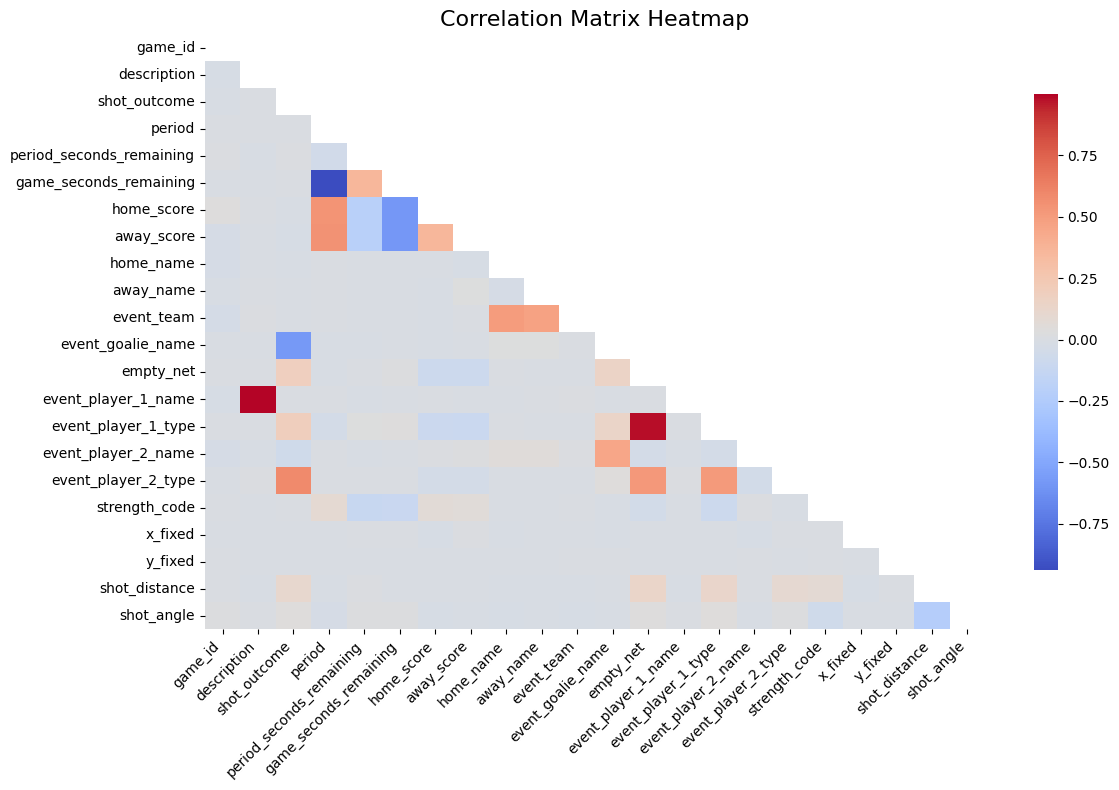

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add title for better readability
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)  # Ensure y-axis labels are horizontal
plt.tight_layout()  # Avoid clipping labels
plt.show()



# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask applied
sns.heatmap(corr_matrix, mask=mask, cmap="coolwarm", annot=True, fmt=".2f", 
            cbar_kws={"shrink": 0.8})

# Customize the title and display
plt.title("Correlation Matrix Heatmap (Lower Triangle)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()



<Axes: >

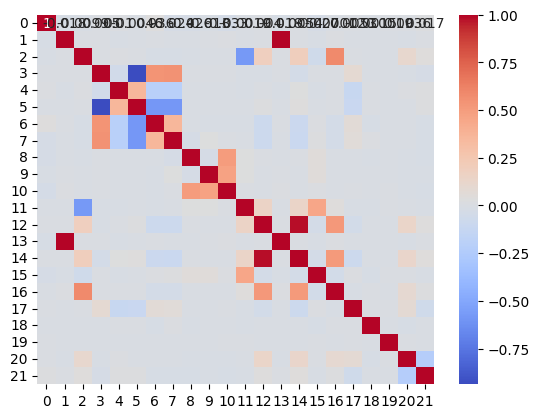

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)
corr_matrix = pd.DataFrame(normalized_data).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")


                     Feature  Importance
15       event_player_2_type    0.348926
10         event_goalie_name    0.287523
19             shot_distance    0.136259
20                shot_angle    0.116959
13       event_player_1_type    0.052236
11                 empty_net    0.050294
18                   y_fixed    0.002035
17                   x_fixed    0.001835
14       event_player_2_name    0.001810
3   period_seconds_remaining    0.000410
16             strength_code    0.000361
4     game_seconds_remaining    0.000311
5                 home_score    0.000233
2                     period    0.000213
6                 away_score    0.000191
1                description    0.000098
7                  home_name    0.000068
8                  away_name    0.000063
0                    game_id    0.000062
12       event_player_1_name    0.000061
9                 event_team    0.000051


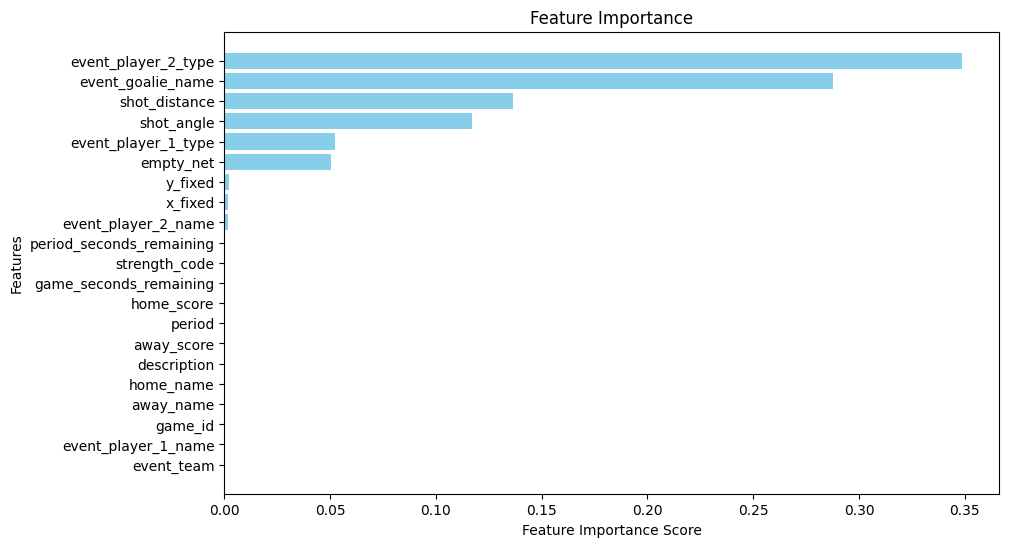

                     Feature  Importance
10         event_goalie_name    0.335760
13       event_player_1_type    0.031680
15       event_player_2_type    0.024590
11                 empty_net    0.005423
19             shot_distance    0.000000
18                   y_fixed    0.000000
17                   x_fixed    0.000000
16             strength_code    0.000000
14       event_player_2_name    0.000000
12       event_player_1_name    0.000000
0                    game_id    0.000000
1                description    0.000000
9                 event_team    0.000000
8                  away_name    0.000000
7                  home_name    0.000000
6                 away_score    0.000000
5                 home_score    0.000000
4     game_seconds_remaining    0.000000
3   period_seconds_remaining    0.000000
2                     period    0.000000
20                shot_angle    0.000000


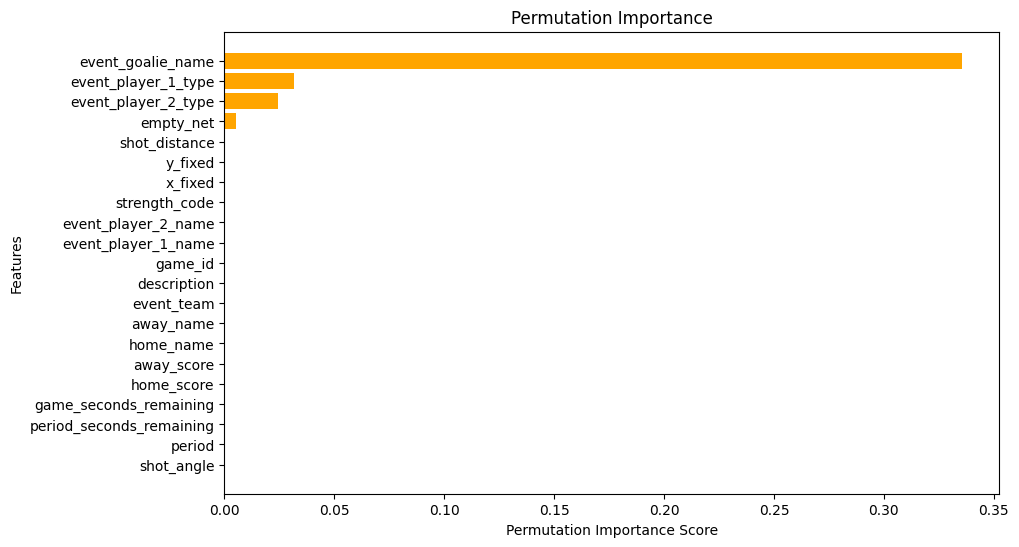

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.inspection import permutation_importance

import numpy as np

# Sample data (replace with your dataset)
X = df_encoded.drop(columns=['shot_outcome'])  # Features
y = df_encoded['shot_outcome']                # Target

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importance scores
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_importances)

# Visualize feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


# Compute permutation importance
perm_importance = permutation_importance(rf, X, y, scoring='accuracy')

# Convert to DataFrame
perm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Display permutation importance
print(perm_importance_df)

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'], color='orange')
plt.xlabel('Permutation Importance Score')
plt.ylabel('Features')
plt.title('Permutation Importance')
plt.gca().invert_yaxis()
plt.show()

### Remove no related columns 

In [ ]:
important_features = ['event_player_2_type','event_goalie_name','shot_distance'  ,'shot_angle' ,'event_player_1_type','empty_net', 'y_fixed','x_fixed','event_player_2name' ]


## Handling missing values on the ımportant features

In [ ]:
df['empty_net'].value_counts()

empty_net
False    8195
True      517
Name: count, dtype: int64

In [ ]:
# Fill NaN values with boolean False, then infer objects to avoid warnings
df['empty_net'] = df['empty_net'].fillna(False)
df['empty_net'] = df['empty_net'].infer_objects()
df['empty_net'] = df['empty_net'].astype(bool)

C:\Users\NURŞAH SATILMIŞ\AppData\Local\Temp\ipykernel_30400\1553471446.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['empty_net'] = df['empty_net'].fillna(False)


In [ ]:
df['empty_net'].value_counts()

empty_net
False    160055
True        517
Name: count, dtype: int64

In [ ]:
df['empty_net'].isnull().sum()

0

`event_goalie_name`    : String name of goalie/ goalkeeper (if in net) 
it related to empthy_net features , we should ınvestigate both

In [ ]:
# Look at the values
df['event_goalie_name'].isnull().sum()

71509

In [ ]:
# filter the part of 'event_goalie name' is missing
temp = df[df['event_goalie_name'].isnull()] 
temp['empty_net'].value_counts()

empty_net
False    70992
True       517
Name: count, dtype: int64

Out of 71,526 instances, 517 missing `event_goalie_name` values indicate situations where there was actually nobody in the net. We can impute these values with 'nobody' to signify an empty net scenario. However, the reason for the remaining missing values is unknown."

In [ ]:
# Fill missing 'event_goalie_name' values with 'nobody' where 'empty_net' is True 
df.loc[(df['event_goalie_name'].isnull()) & (df['empty_net'] == True), 'event_goalie_name'] = 'nobody'


In [ ]:
df['event_goalie_name'].isnull().sum()

70992

517 of missing values was handled. by "nobody" label which indicates nobody save net.

In [ ]:
df['event_goalie_name'] = df['event_goalie_name'].fillna('Unknown')

In [ ]:
df['event_goalie_name'].isnull().sum()

0

Other missing values filled by "unknown" , it indicates that we do not know the golie name or whether was there a golie or not .

`event_player_2_name` :  String name of the secondary event player                                                                     
`event_player_2_type` : String indicator for the role of event_player_2 (blocker, assist, or goalie)

In [ ]:
df[(df['event_player_2_name'].isna())].isnull().sum()


game_id                       0
description                   0
shot_outcome                  0
period                        0
period_seconds_remaining      0
game_seconds_remaining        0
home_score                    0
away_score                    0
home_name                     0
away_name                     0
event_team                    0
event_goalie_name             0
empty_net                     0
event_player_1_name           0
event_player_1_type           0
event_player_2_name         374
event_player_2_type         374
strength_code                 0
x_fixed                       0
y_fixed                       0
shot_distance                 0
shot_angle                    0
dtype: int64

Where event_player_2_name is missing event_player_2_type is also missing as we expected. We will handle both features together.

In [ ]:
df['event_player_2_type'].value_counts()

event_player_2_type
Goalie     81325
Blocker    38224
Unknown    32485
Assist      8164
Name: count, dtype: int64

In [ ]:
df [df['event_player_2_type'] == 'Unknown']

,game_id,description,shot_outcome,period,period_seconds_remaining,game_seconds_remaining,home_score,away_score,home_name,away_name,...,empty_net,event_player_1_name,event_player_1_type,event_player_2_name,event_player_2_type,strength_code,x_fixed,y_fixed,shot_distance,shot_angle
19,2021020001,Chad Ruhwedel Wide of Net Andrei Vasilevskiy,MISSED_SHOT,1,702,3102,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,False,Chad.Ruhwedel,Shooter,Andrei.Vasilevskiy,Unknown,EV,-32.0,35.0,66.9,31.6
22,2021020001,Victor Hedman Wide of Net Tristan Jarry,MISSED_SHOT,1,465,2865,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,False,Victor.Hedman,Shooter,Tristan.Jarry,Unknown,EV,48.0,34.0,53.3,39.7
24,2021020001,Victor Hedman Wide of Net Tristan Jarry,MISSED_SHOT,1,449,2849,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,False,Victor.Hedman,Shooter,Tristan.Jarry,Unknown,EV,49.0,28.0,48.8,35.0
26,2021020001,Teddy Blueger Wide of Net Andrei Vasilevskiy,MISSED_SHOT,1,391,2791,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,False,Teddy.Blueger,Shooter,Andrei.Vasilevskiy,Unknown,EV,-61.0,33.0,43.3,49.7
28,2021020001,Brian Dumoulin Wide of Net Andrei Vasilevskiy,MISSED_SHOT,1,262,2662,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,False,Brian.Dumoulin,Shooter,Andrei.Vasilevskiy,Unknown,EV,-37.0,-31.0,60.5,30.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160546,2021030416,Nazem Kadri Wide of Net Andrei Vasilevskiy,MISSED_SHOT,3,983,983,1,2,Tampa Bay Lightning,Colorado Avalanche,...,False,Nazem.Kadri,Shooter,Andrei.Vasilevskiy,Unknown,EV,-65.0,-4.0,24.3,9.5
160551,2021030416,Nazem Kadri Wide of Net Andrei Vasilevskiy,MISSED_SHOT,3,806,806,1,2,Tampa Bay Lightning,Colorado Avalanche,...,False,Nazem.Kadri,Shooter,Andrei.Vasilevskiy,Unknown,EV,-74.0,-1.0,15.0,3.8
160552,2021030416,Valeri Nichushkin Wide of Net Andrei Vasilevskiy,MISSED_SHOT,3,805,805,1,2,Tampa Bay Lightning,Colorado Avalanche,...,False,Valeri.Nichushkin,Shooter,Andrei.Vasilevskiy,Unknown,EV,-72.0,-11.0,20.2,32.9
160562,2021030416,Ross Colton Wide of Net Darcy Kuemper,MISSED_SHOT,3,314,314,1,2,Tampa Bay Lightning,Colorado Avalanche,...,False,Ross.Colton,Shooter,Darcy.Kuemper,Unknown,EV,73.0,-3.0,16.3,10.6


The "unknown" label in the event_player_2_type column indicates that the player is known, but their specific task is not. Initially, I considered filling the missing values with the label "unknown" at first. However, this approach may introduce ambiguity, as it conflates genuinely missing data with situations where the player's task is explicitly marked as "unknown."
Given that only 306 values are missing, which is a small proportion of the dataset, dropping these rows is make sense.

In [ ]:
df['event_player_2_type'] = df['event_player_2_type'].dropna()
df['event_player_2_name'] = df['event_player_2_name'].dropna()

???? why there is still null values we drop them????

In [ ]:
df.isnull().sum()

game_id                         0
description                     0
shot_outcome                    0
period                          0
period_seconds_remaining        0
game_seconds_remaining          0
home_score                      0
away_score                      0
home_name                       0
away_name                       0
event_team                      0
event_goalie_name               0
empty_net                       0
event_player_1_name             0
event_player_1_type             0
event_player_2_name           374
event_player_2_type           374
strength_code                 306
x_fixed                        13
y_fixed                        13
shot_distance               38224
shot_angle                  38224
dtype: int64

`shot_distance`

In [ ]:
df[df['shot_distance'].isnull()]

,game_id,description,shot_outcome,period,period_seconds_remaining,game_seconds_remaining,home_score,away_score,home_name,away_name,...,empty_net,event_player_1_name,event_player_1_type,event_player_2_name,event_player_2_type,strength_code,x_fixed,y_fixed,shot_distance,shot_angle
1,2021020001,Zach Bogosian shot blocked shot by Brock McGinn,BLOCKED_SHOT,1,1115,3515,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,False,Zach.Bogosian,Shooter,Brock.McGinn,Blocker,EV,60.0,-17.0,NaN,NaN
6,2021020001,Erik Cernak shot blocked shot by Danton Heinen,BLOCKED_SHOT,1,1009,3409,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,False,Erik.Cernak,Shooter,Danton.Heinen,Blocker,EV,52.0,-21.0,NaN,NaN
7,2021020001,Evan Rodrigues shot blocked shot by Ryan McDonagh,BLOCKED_SHOT,1,987,3387,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,False,Evan.Rodrigues,Shooter,Ryan.McDonagh,Blocker,EV,-71.0,11.0,NaN,NaN
11,2021020001,Jan Rutta shot blocked shot by Mark Friedman,BLOCKED_SHOT,1,882,3282,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,False,Jan.Rutta,Shooter,Mark.Friedman,Blocker,EV,76.0,-1.0,NaN,NaN
14,2021020001,Kris Letang shot blocked shot by Ross Colton,BLOCKED_SHOT,1,847,3247,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,False,Kris.Letang,Shooter,Ross.Colton,Blocker,EV,-76.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160565,2021030416,Erik Johnson shot blocked shot by Steven Stamkos,BLOCKED_SHOT,3,224,224,1,2,Tampa Bay Lightning,Colorado Avalanche,...,False,Erik.Johnson,Shooter,Steven.Stamkos,Blocker,EV,-74.0,2.0,NaN,NaN
160567,2021030416,Bowen Byram shot blocked shot by Anthony Cirelli,BLOCKED_SHOT,3,150,150,1,2,Tampa Bay Lightning,Colorado Avalanche,...,False,Bowen.Byram,Shooter,Anthony.Cirelli,Blocker,EV,-65.0,-6.0,NaN,NaN
160568,2021030416,Mikhail Sergachev shot blocked shot by Erik Jo...,BLOCKED_SHOT,3,138,138,1,2,Tampa Bay Lightning,Colorado Avalanche,...,False,Mikhail.Sergachev,Shooter,Erik.Johnson,Blocker,EV,76.0,2.0,NaN,NaN
160569,2021030416,Nikita Kucherov shot blocked shot by Gabriel L...,BLOCKED_SHOT,3,101,101,1,2,Tampa Bay Lightning,Colorado Avalanche,...,False,Nikita.Kucherov,Shooter,Gabriel.Landeskog,Blocker,PP,74.0,-5.0,NaN,NaN


In [ ]:
temp =df[df['shot_distance'].isnull()]
temp['shot_outcome'].info()

<class 'pandas.core.series.Series'>
Index: 38224 entries, 1 to 160572
Series name: shot_outcome
Non-Null Count  Dtype 
--------------  ----- 
38224 non-null  object
dtypes: object(1)
memory usage: 597.2+ KB


<Axes: >

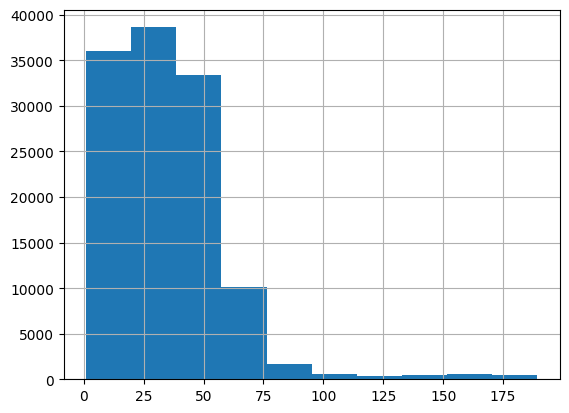

In [ ]:
df['shot_distance'].hist()

The output shows that when a shot is blocked, the 'shot_distance' becomes null. We can replace the null values with '-1'. Since the shot distance starts from zero, this substitution should not cause any issues.



In [ ]:
df['shot_distance']= df['shot_distance'].fillna(-1)
df['shot_distance'].isnull().sum()

0

`shot_angle`

In [ ]:
df['shot_angle'].info()

<class 'pandas.core.series.Series'>
Index: 160572 entries, 0 to 160572
Series name: shot_angle
Non-Null Count   Dtype  
--------------   -----  
122348 non-null  float64
dtypes: float64(1)
memory usage: 2.5 MB


In [ ]:
df[df['shot_angle'].isnull()]

,game_id,description,shot_outcome,period,period_seconds_remaining,game_seconds_remaining,home_score,away_score,home_name,away_name,...,empty_net,event_player_1_name,event_player_1_type,event_player_2_name,event_player_2_type,strength_code,x_fixed,y_fixed,shot_distance,shot_angle
1,2021020001,Zach Bogosian shot blocked shot by Brock McGinn,BLOCKED_SHOT,1,1115,3515,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,False,Zach.Bogosian,Shooter,Brock.McGinn,Blocker,EV,60.0,-17.0,-1.0,NaN
6,2021020001,Erik Cernak shot blocked shot by Danton Heinen,BLOCKED_SHOT,1,1009,3409,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,False,Erik.Cernak,Shooter,Danton.Heinen,Blocker,EV,52.0,-21.0,-1.0,NaN
7,2021020001,Evan Rodrigues shot blocked shot by Ryan McDonagh,BLOCKED_SHOT,1,987,3387,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,False,Evan.Rodrigues,Shooter,Ryan.McDonagh,Blocker,EV,-71.0,11.0,-1.0,NaN
11,2021020001,Jan Rutta shot blocked shot by Mark Friedman,BLOCKED_SHOT,1,882,3282,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,False,Jan.Rutta,Shooter,Mark.Friedman,Blocker,EV,76.0,-1.0,-1.0,NaN
14,2021020001,Kris Letang shot blocked shot by Ross Colton,BLOCKED_SHOT,1,847,3247,0,0,Tampa Bay Lightning,Pittsburgh Penguins,...,False,Kris.Letang,Shooter,Ross.Colton,Blocker,EV,-76.0,1.0,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160565,2021030416,Erik Johnson shot blocked shot by Steven Stamkos,BLOCKED_SHOT,3,224,224,1,2,Tampa Bay Lightning,Colorado Avalanche,...,False,Erik.Johnson,Shooter,Steven.Stamkos,Blocker,EV,-74.0,2.0,-1.0,NaN
160567,2021030416,Bowen Byram shot blocked shot by Anthony Cirelli,BLOCKED_SHOT,3,150,150,1,2,Tampa Bay Lightning,Colorado Avalanche,...,False,Bowen.Byram,Shooter,Anthony.Cirelli,Blocker,EV,-65.0,-6.0,-1.0,NaN
160568,2021030416,Mikhail Sergachev shot blocked shot by Erik Jo...,BLOCKED_SHOT,3,138,138,1,2,Tampa Bay Lightning,Colorado Avalanche,...,False,Mikhail.Sergachev,Shooter,Erik.Johnson,Blocker,EV,76.0,2.0,-1.0,NaN
160569,2021030416,Nikita Kucherov shot blocked shot by Gabriel L...,BLOCKED_SHOT,3,101,101,1,2,Tampa Bay Lightning,Colorado Avalanche,...,False,Nikita.Kucherov,Shooter,Gabriel.Landeskog,Blocker,PP,74.0,-5.0,-1.0,NaN


In [ ]:
temp= df['shot_outcome'][df['event_player_2_name'].notna()]
temp.value_counts()


shot_outcome
SHOT            80647
BLOCKED_SHOT    38224
MISSED_SHOT     32485
GOAL             8842
Name: count, dtype: int64

<Axes: >

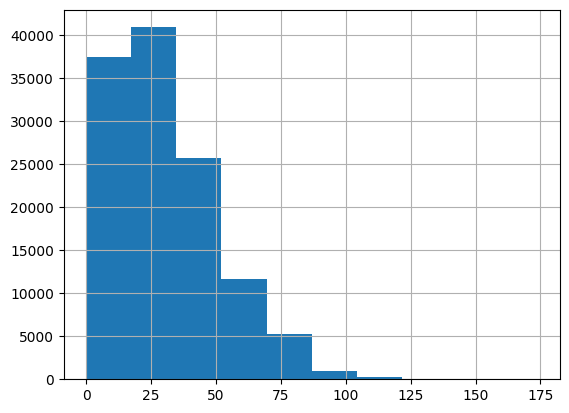

In [ ]:
df['shot_angle'].hist()

Shot angle doesn't exist for blocked shot. We can fill it by "-1" to put a mark

In [ ]:
df['shot_angle']= df['shot_angle'].fillna(-1)
df['shot_angle'].isnull().sum()

0

In [ ]:
df.isnull().sum()

game_id                       0
description                   0
shot_outcome                  0
period                        0
period_seconds_remaining      0
game_seconds_remaining        0
home_score                    0
away_score                    0
home_name                     0
away_name                     0
event_team                    0
event_goalie_name             0
empty_net                     0
event_player_1_name           0
event_player_1_type           0
event_player_2_name         374
event_player_2_type         374
strength_code               306
x_fixed                      13
y_fixed                      13
shot_distance                 0
shot_angle                    0
dtype: int64

In [ ]:
df['strength_code'].value_counts()

strength_code
EV    128437
PP     26277
SH      5552
Name: count, dtype: int64

In [ ]:
df['strength_code'].isnull().sum()

306

In [ ]:
df[df['strength_code'].isnull()].isnull().sum()

game_id                       0
description                   0
shot_outcome                  0
period                        0
period_seconds_remaining      0
game_seconds_remaining        0
home_score                    0
away_score                    0
home_name                     0
away_name                     0
event_team                    0
event_goalie_name             0
empty_net                     0
event_player_1_name           0
event_player_1_type           0
event_player_2_name           0
event_player_2_type           0
strength_code               306
x_fixed                       0
y_fixed                       0
shot_distance                 0
shot_angle                    0
dtype: int64

there is no related missing values where strength_code is misssing.

In [ ]:
df['strength_code'] = df['strength_code'].dropna()
df['strength_code'] = df['strength_code'].dropna()
df.isnull().sum()

game_id                       0
description                   0
shot_outcome                  0
period                        0
period_seconds_remaining      0
game_seconds_remaining        0
home_score                    0
away_score                    0
home_name                     0
away_name                     0
event_team                    0
event_goalie_name             0
empty_net                     0
event_player_1_name           0
event_player_1_type           0
event_player_2_name         374
event_player_2_type         374
strength_code               306
x_fixed                      13
y_fixed                      13
shot_distance                 0
shot_angle                    0
dtype: int64

## Data Visualization

In [ ]:
# summarize the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160572 entries, 0 to 160572
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   game_id                   160572 non-null  int64  
 1   description               160572 non-null  object 
 2   shot_outcome              160572 non-null  object 
 3   period                    160572 non-null  int64  
 4   period_seconds_remaining  160572 non-null  int64  
 5   game_seconds_remaining    160572 non-null  int64  
 6   home_score                160572 non-null  int64  
 7   away_score                160572 non-null  int64  
 8   home_name                 160572 non-null  object 
 9   away_name                 160572 non-null  object 
 10  event_team                160572 non-null  object 
 11  event_goalie_name         160572 non-null  object 
 12  empty_net                 160572 non-null  bool   
 13  event_player_1_name       160572 non-null  object

In [ ]:
numerical_features =['period','period_seconds_remaining','game_seconds_remaining','home_score','away_score','x_fixed','y_fixed','shot_distance','shot_angle']
categorical_features = df.columns.difference(numerical_features).tolist()


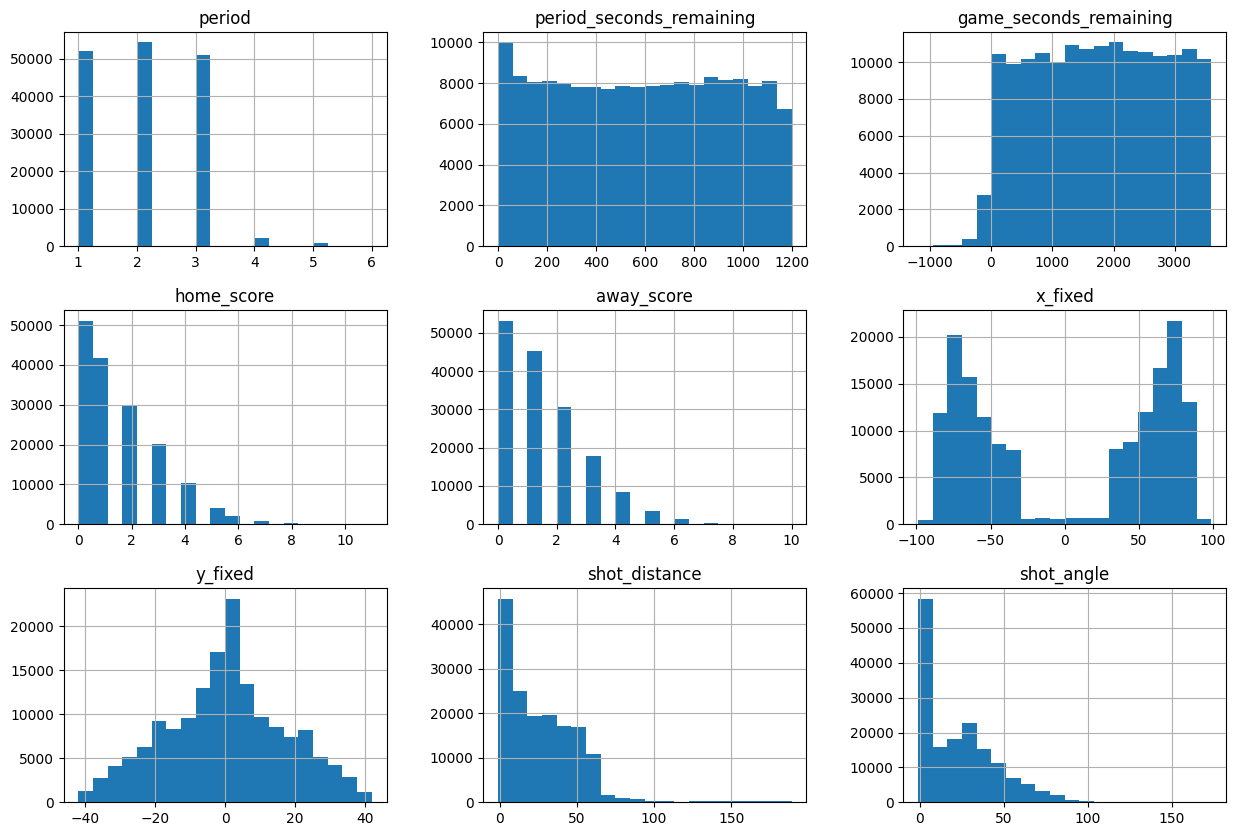

Text(0.5, 0.98, 'Histograms of Features')

<Figure size 640x480 with 0 Axes>

In [ ]:
#Histograms for numerical features
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.show()
plt.suptitle("Histograms of Features")


#visualization of categorical features (value.counts() took large time)


In [ ]:
# Loop through each categorical feature and plot its distribution
break
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


SyntaxError: 'break' outside loop (1899685474.py, line 2)

# Downsampling 

## Label Encoding & Normalization

## PCA?

## Data Splitting

## Model Building

QUESTİONS :

Feature engineering . How can I decide which features should be selected? korolasyon analizi ile karar ver  
Should I decide select features first or select model first ? feature selection 
I will experiment on  Linear regression or knn 
Ensemble models like DT , Boosting models
SVM
and neural network (kerasClassifier)

First find best model then experiment